In [24]:
!sudo pip install d2l

Looking in indexes: http://mirrors.ops.ctripcorp.com/pypi-latest/simple
     |████████████████████████████████| 81kB 4.1MB/s eta 0:00:011
     |████████████████████████████████| 122kB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 122kB 69.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 59.3MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 40.9MB/s eta 0:00:01
     |████████████████████████████████| 245kB 63.4MB/s eta 0:00:01


In [1]:
%matplotlib inline
import numpy as np
from IPython import display
import tensorflow as tf
from d2l import tensorflow as d2l

In [2]:
## f(x)=3x^2-4x

def f(x):
    return 3 * x ** 2 - 4 * x

In [3]:
## f'(x)=6x-4=lim(h->0)(f(x+h)-f(x))/h

def numerical_lim(f, x, h):
    return (f(x+h) - f(x)) / h

In [4]:
## f'(x)|x=1 = 2

h = 0.1
for i in range(5):
    print("h={:f}, numerical limit = {:5f}".format(h,numerical_lim(f, 1, h)))
    h *= 0.1

h=0.100000, numerical limit = 2.300000
h=0.010000, numerical limit = 2.030000
h=0.001000, numerical limit = 2.003000
h=0.000100, numerical limit = 2.000300
h=0.000010, numerical limit = 2.000030


In [5]:
## 设置matplotlib的轴，作图

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [6]:
## 绘制数据点

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-','m--','g-','r:'), figsize=(3.5,2.5), axes=None):
    if legend is None:
        lengend = []

    # set_figsize
    display.set_matplotlib_formats('svg')  # 使用svg格式在Jupyter中显示绘图
    d2l.plt.rcParams['figure.figsize'] = figsize  # 设置matplotlib的图表大小
    
    # X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim==1) or (isinstance(X,list) and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X,Y = [[]] * len(X), X
    elif has_one_axis(Y):
        X = X * len(Y)
    
    # set_axes
    axes = axes if axes else d2l.plt.gca()
    axes.cla()
    
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
            
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    

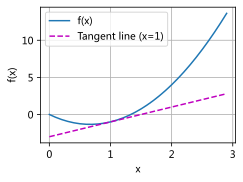

In [7]:
x = np.arange(0,3,0.1)
plot([x, x], [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])